In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
print(tf.__version__) #version check

2.5.0


# 1. Train your first model

In [3]:
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data() # data load
x_train, x_test = x_train / 255.0, x_test / 255.0 # data preprocessing

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape, y_train.shape) #check your data shape

# 2. Move to Convolutional Neural Network!

In [59]:
your_cnn = tf.keras.models.Sequential()
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Flatten())
your_cnn.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
your_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

your_cnn.build([None, 32, 32, 3])

In [60]:
your_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
history = your_cnn.fit(x_train, y_train, epochs=20, validation_split=0.2)
print(history.history.keys())
your_cnn.evaluate(x_test,  y_test, verbose=2)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5479 - accuracy: 0.4320 - val_loss: 1.1650 - val_accuracy: 0.5782
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0238 - accuracy: 0.6327 - val_loss: 0.9205 - val_accuracy: 0.6662
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7918 - accuracy: 0.7140 - val_loss: 0.7633 - val_accuracy: 0.7370
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6415 - accuracy: 0.7702 - val_loss: 0.7477 - val_accuracy: 0.7385
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5164 - accuracy: 0.8182 - val_loss: 0.7362 - val_accuracy: 0.7494
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4098 - accuracy: 0.8527 - val_loss: 0.7793 - val_accuracy: 0.7545
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3202 - accuracy: 0.8851 - val_loss: 0.8506 - val_accuracy:

[1.6013424396514893, 0.7217000126838684]

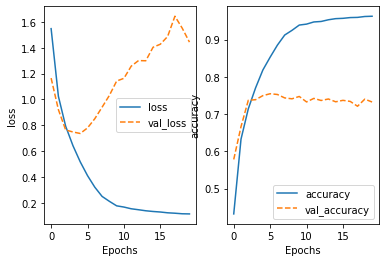

In [62]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

# Add Dropout layers

In [51]:
your_cnn = tf.keras.models.Sequential()
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Dropout(0.25))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Dropout(0.25))
your_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
your_cnn.add(tf.keras.layers.Dropout(0.25))
your_cnn.add(tf.keras.layers.Flatten())
your_cnn.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
your_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

your_cnn.build([None, 32, 32, 3])

In [52]:
your_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = your_cnn.fit(x_train, y_train, epochs=20, validation_split=0.2)
print(history.history.keys())
your_cnn.evaluate(x_test,  y_test, verbose=2)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6246 - accuracy: 0.3943 - val_loss: 1.2308 - val_accuracy: 0.5448
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1611 - accuracy: 0.5854 - val_loss: 1.0447 - val_accuracy: 0.6269
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9617 - accuracy: 0.6580 - val_loss: 0.8916 - val_accuracy: 0.6778
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8368 - accuracy: 0.7041 - val_loss: 0.7966 - val_accuracy: 0.7210
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7607 - accuracy: 0.7333 - val_loss: 0.7315 - val_accuracy: 0.7448
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6906 - accuracy: 0.7549 - val_loss: 0.7463 - val_accuracy: 0.7456
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6469 - accuracy: 0.7709 - val_loss: 0.7334 - val_accuracy:

[0.8009272813796997, 0.7678999900817871]

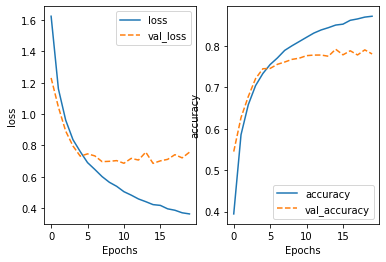

In [58]:
fig = plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], '-', label='loss')
plt.plot(history.epoch, history.history['val_loss'], '--', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
fig = plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], '-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()